In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense

from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline

In [3]:
try:
  data = pd.read_csv('Structured_features.csv')
except:
  print('No such file')

data['Erbium Concentration'] = data['Erbium Concentration'].astype(str)
data

,Longitudinal modulus,Shear modulus,Bulk modulus,Young modulus,Poisson's ratio,Hardness,fractal bond connectivity,acoustic impedance,Erbium Concentration
0,60.505571,20.125896,33.671042,50.346610,0.250792,3.343693,2.390885,17.829646,0.01
1,61.749309,20.539600,34.363176,51.381524,0.250792,3.412425,2.390885,18.196148,0.01
2,60.206152,20.026301,33.504417,50.097465,0.250792,3.327146,2.390885,17.741414,0.01
3,62.014179,20.627703,34.510575,51.601922,0.250792,3.427063,2.390885,18.274199,0.01
4,62.831822,20.899675,34.965589,52.282281,0.250792,3.472248,2.390885,18.515140,0.01
...,...,...,...,...,...,...,...,...,...
245,58.273308,19.835527,31.825938,49.270607,0.241979,3.411991,2.493001,17.663388,0.05
246,57.141365,19.450228,31.207728,48.313539,0.241979,3.345714,2.493001,17.320282,0.05
247,61.777979,21.028475,33.740012,52.233838,0.241979,3.617195,2.493001,18.725699,0.05
248,58.251540,19.828118,31.814050,49.252202,0.241979,3.410717,2.493001,17.656790,0.05


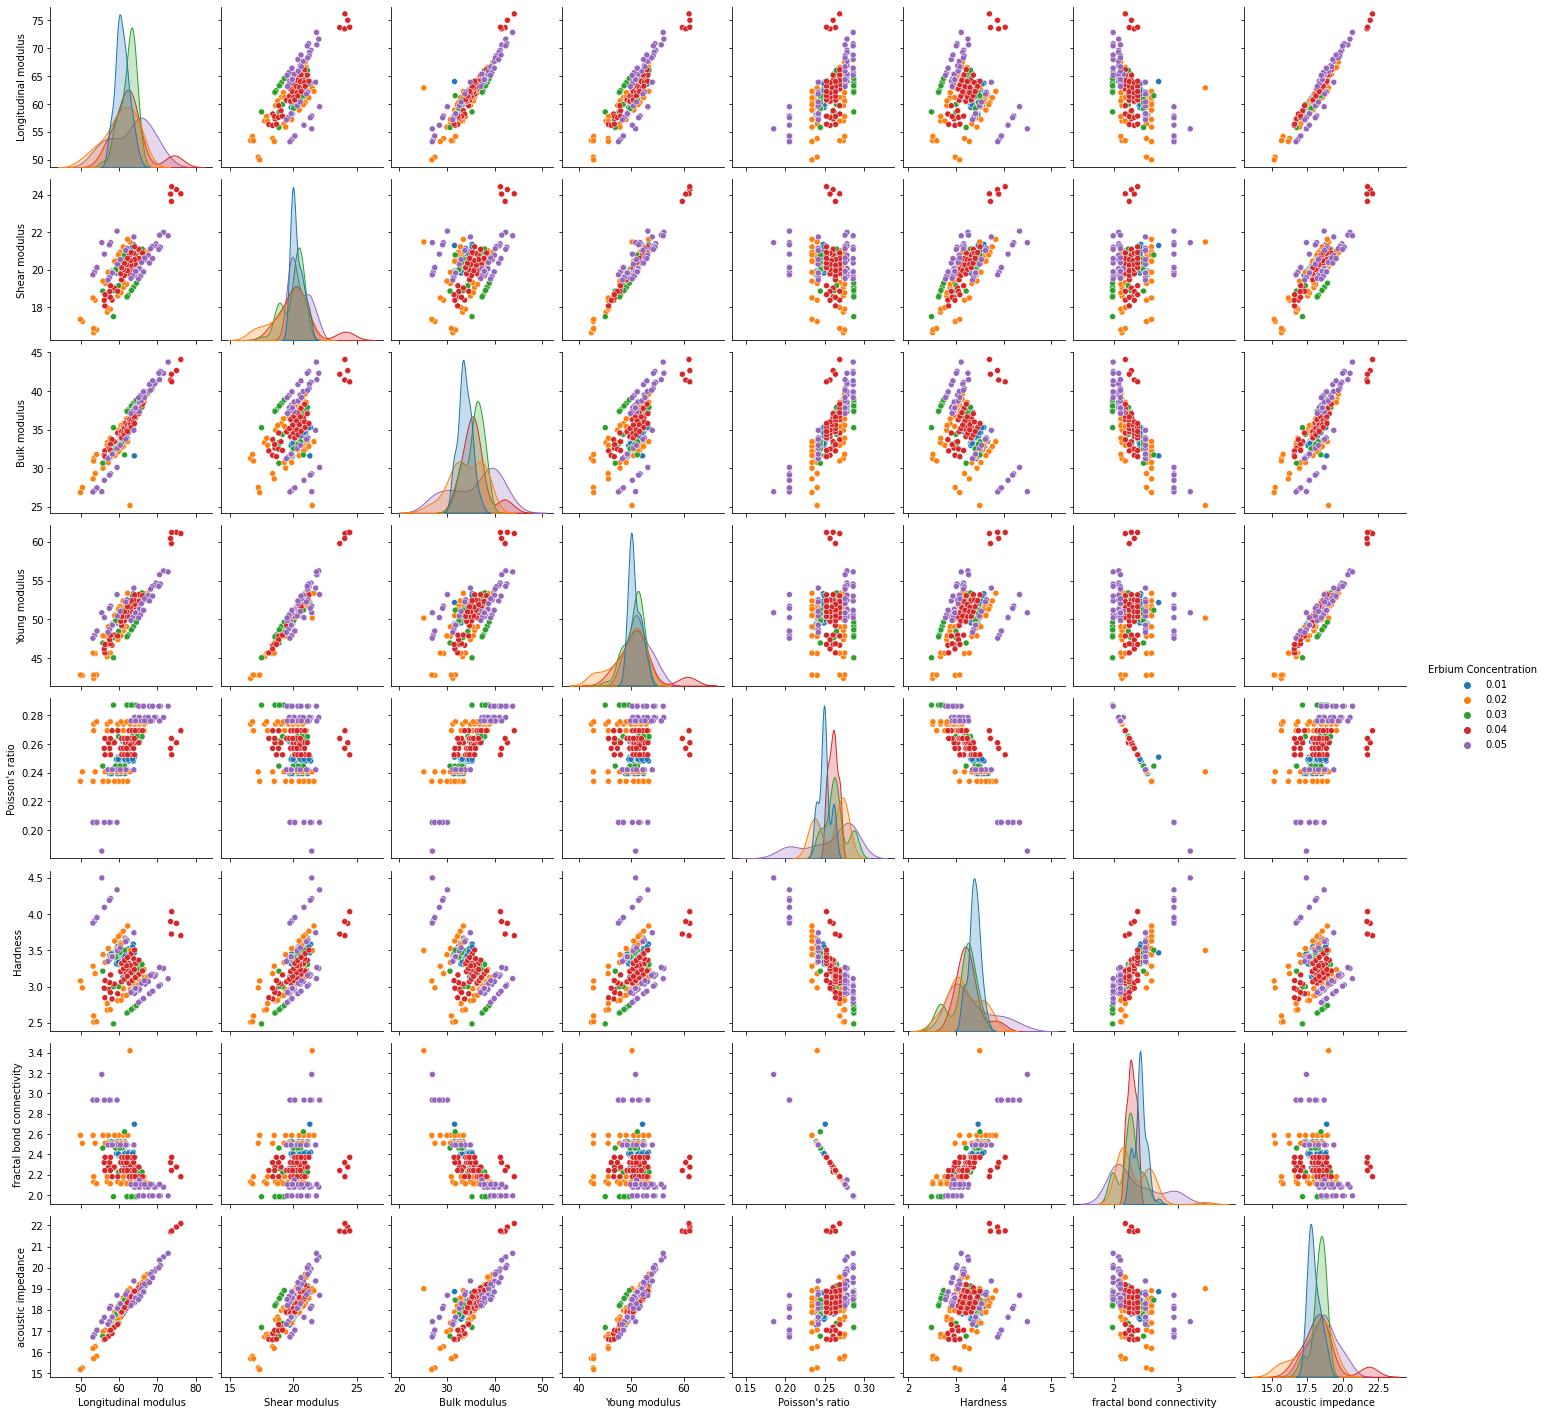

In [4]:
sns.pairplot(data, diag_kind='kde', hue="Erbium Concentration")

In [5]:
# # Get one hot encoding
# one_hot = pd.get_dummies(data['Erbium Concentration'])

# # Join the encoded df
# data = data.join(one_hot)
# data

In [7]:
train_data = data.sample(frac=0.8, random_state=0)
test_data = data.drop(train_data.index)

index_column = train_data.columns.get_loc('Erbium Concentration')

train_x = train_data[train_data.columns[:index_column]]
act_train_y = train_data[train_data.columns[index_column:]]
encoded = OneHotEncoder()
train_y = encoded.fit_transform(act_train_y).toarray()

test_x = test_data[test_data.columns[:index_column]]
act_test_y = test_data[test_data.columns[index_column:]]
test_y = encoded.fit_transform(act_test_y).toarray()

In [8]:
def binarycross_dnn(n_inputs, n_outputs):
	model = Sequential()
	model.add(Dense(128, input_dim=n_inputs, activation='relu'))
	model.add(Dense(512, input_dim=n_inputs, activation='relu'))
	model.add(Dense(1024, activation='relu'))
	model.add(Dense(256, activation='relu'))
	model.add(Dense(n_outputs, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 
	return model

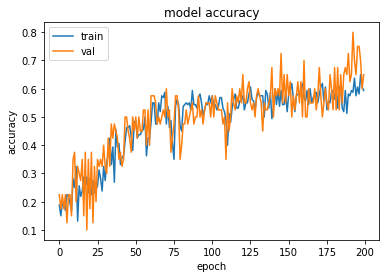

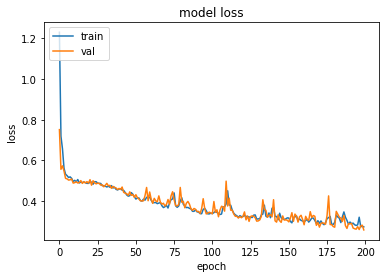

In [9]:
bc_dnn = binarycross_dnn(train_x.shape[1], train_y.shape[1])
bc_history = bc_dnn.fit(train_x, train_y, validation_split=0.20, verbose=0, epochs=200)

plt.plot(bc_history.history['accuracy'])
plt.plot(bc_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(bc_history.history['loss'])
plt.plot(bc_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [10]:
test_loss, test_acc = bc_dnn.evaluate(test_x, test_y, verbose=0)
print('Test accuracy:', test_acc)

Test accuracy: 0.6000000238418579


In [11]:
def accuracy(confusion_matrix):
  diagonal_sum = confusion_matrix.trace()
  sum_of_all_elements = confusion_matrix.sum()
  return diagonal_sum / sum_of_all_elements

def test_model(train_data, train_label, test_data, test_label):
  pred_y = bc_dnn.predict(test_data).round()
  train_loss, train_acc = bc_dnn.evaluate(train_data, train_label, verbose=0)
  test_loss, test_acc = bc_dnn.evaluate(test_data, test_label, verbose=0)

  print('Training Accuracy : %.3f'%train_acc)
  print('Test Accuracy : %.3f'%test_acc)

  actual_label = encoded.inverse_transform(test_label)
  predict_label = encoded.inverse_transform(pred_y)
  plt.figure(figsize=(10,7))
  cm = confusion_matrix(predict_label, actual_label)
  print("Accuracy score :", accuracy(cm))

  sns.set(font_scale=1.4) # for label size
  sns.heatmap(cm, annot=True, annot_kws={"size": 16})
  plt.show()

Training Accuracy : 0.605
Test Accuracy : 0.600
Accuracy score : 0.58


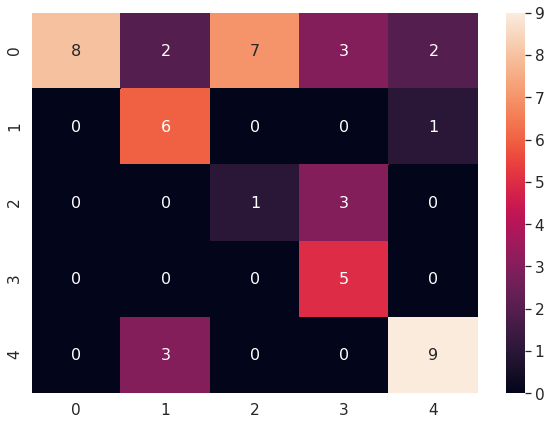

In [12]:
test_model(train_x, train_y, test_x, test_y)